In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


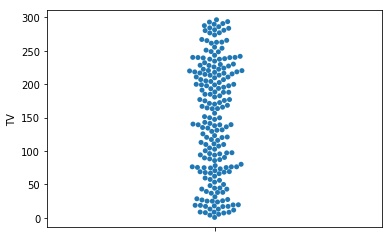

In [3]:
sns.swarmplot(y=df['TV'])

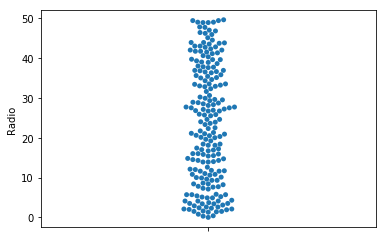

In [4]:
sns.swarmplot(y=df['Radio'])

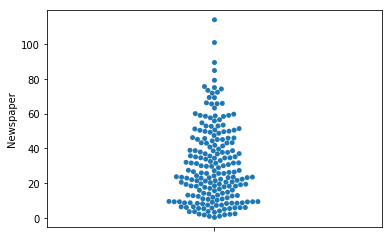

In [5]:
sns.swarmplot(y=df['Newspaper'])

# Upper few points looks like they are outliers.

In [6]:
# removing outliers
df = df[df['Newspaper'] < 80]

In [7]:
print(df.shape)

(196, 4)


In [8]:
# Now, let's try regression on this data.
reg = linear_model.LinearRegression()
x=df[['TV', 'Radio', 'Newspaper']]
y=df['Sales']
reg.fit(x,y)

print("R-squared: ", reg.score(x,y))

R-squared:  0.8979591242423575


It's not bad but we could make it better. Let's try checking assumptions.

In [9]:
predicted = reg.predict(x).ravel()
actual = df['Sales']

In [10]:
residual = actual - predicted

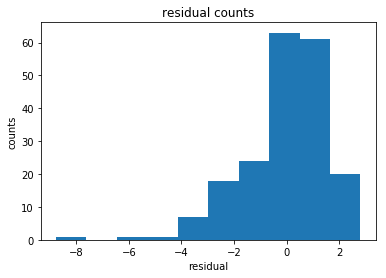

In [11]:
plt.hist(residual)
plt.title('residual counts')
plt.xlabel('residual')
plt.ylabel('counts')
plt.show()

# It contradicts Multivariate Normality assumption.

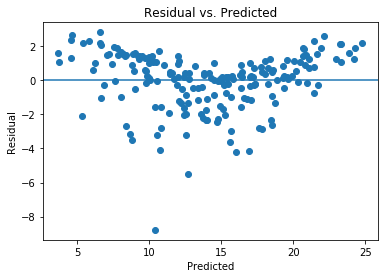

In [12]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# It is clearly showing homoscedastic

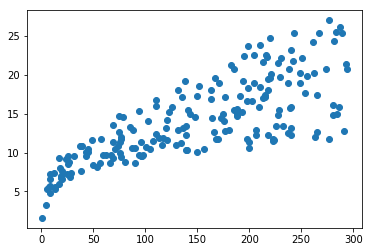

In [13]:
plt.scatter(x['TV'], y)

# We can get square root of this feature to get more consistent linear corelation.

/home/vivek/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


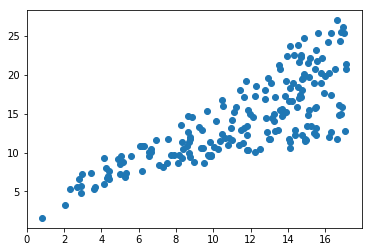

In [14]:
x['TV'] = [math.sqrt(x) for x in df['TV']]

plt.scatter(x['TV'], y)

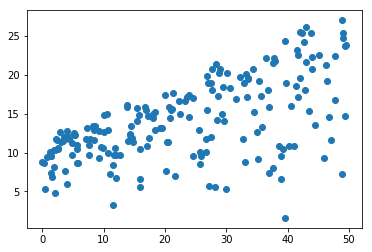

In [15]:
plt.scatter(x['Radio'], y)
# While it's not the case with these two features.

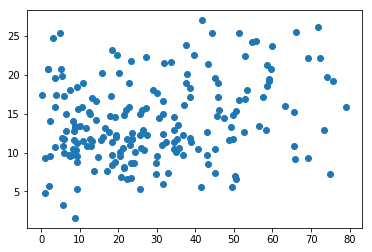

In [16]:
plt.scatter(x['Newspaper'], y)

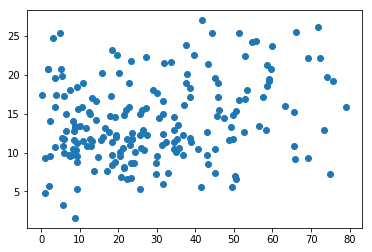

In [17]:
plt.scatter(x['Newspaper'], y)

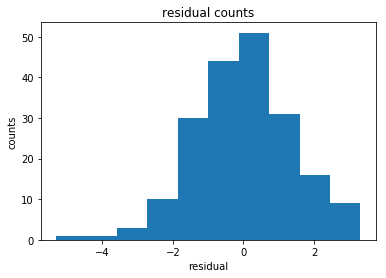

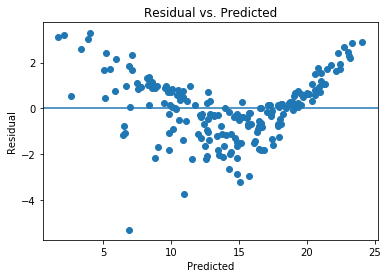

R-squared:  0.9297137756052749


In [18]:
# Check again with Linear Regression whether assumption are fulfilled or not.
reg = linear_model.LinearRegression()
reg.fit(x,y)

predicted = reg.predict(x).ravel()
actual = df['Sales']

residual = actual - predicted

plt.hist(residual)
plt.title('residual counts')
plt.xlabel('residual')
plt.ylabel('counts')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

print("R-squared: ", reg.score(x,y))

So, this did increase accuracy of our model and also graphs looks good.